In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel(r"C:\Users\Mgh59\OneDrive\Escritorio\Clave Python SQL\Portafolio\Segmentacion de Clientes - Clustering\Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# Verificamos informacion del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
# Verificamos valores nulos
df.isnull().sum()                        

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# Eliminamos nulos de las columnas CustomerID y Description
df = df.dropna(subset=['CustomerID', 'Description'])


In [7]:
# Revisamos Duplicados
df.duplicated().sum()

np.int64(5225)

In [8]:
# Eliminamos 
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [9]:
# Eliminamos devoluciones
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]


In [10]:
# Cantidades o precios negativos o cero
print(df[df['Quantity'] <= 0].shape)
print(df[df['UnitPrice'] <= 0].shape)


(0, 8)
(40, 8)


In [11]:
# Los eliminamos
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]


In [12]:
# Nueva columna con el importe total por línea:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [13]:
from datetime import timedelta

#InvoiceDate esté en formato datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Fecha de referencia (día siguiente al último registro)
snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)


In [14]:
# Calcular las métricas RFM
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,   # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'TotalPrice': 'sum'                                       # Monetary
}).reset_index()

# Renombrar las columnas
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [15]:
# Monetary sea positiva
rfm = rfm[rfm['Monetary'] > 0]

# Mostrar un vistazo
print(rfm.describe())
rfm.head()

         CustomerID      Recency    Frequency       Monetary
count   4338.000000  4338.000000  4338.000000    4338.000000
mean   15300.408022    92.536422     4.272015    2054.266460
std     1721.808492   100.014169     7.697998    8989.230441
min    12346.000000     1.000000     1.000000       3.750000
25%    13813.250000    18.000000     1.000000     307.415000
50%    15299.500000    51.000000     2.000000     674.485000
75%    16778.750000   142.000000     5.000000    1661.740000
max    18287.000000   374.000000   209.000000  280206.020000


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [16]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Copiamos el dataframe original para no alterar rfm
rfm_log = rfm.copy()

# Aplicar logaritmo (para evitar problemas con valores muy grandes)
rfm_log['Recency'] = np.log1p(rfm_log['Recency'])
rfm_log['Frequency'] = np.log1p(rfm_log['Frequency'])
rfm_log['Monetary'] = np.log1p(rfm_log['Monetary'])

# Escalamos
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log[['Recency', 'Frequency', 'Monetary']])

# Convertimos a DataFrame para visualizar
rfm_scaled = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])
rfm_scaled.head()


,Recency,Frequency,Monetary
0,1.461993,-0.955214,3.706225
1,-2.038734,1.074425,1.411843
2,0.373104,0.386304,0.716489
3,-0.623086,-0.955214,0.698739
4,1.424558,-0.955214,-0.618962


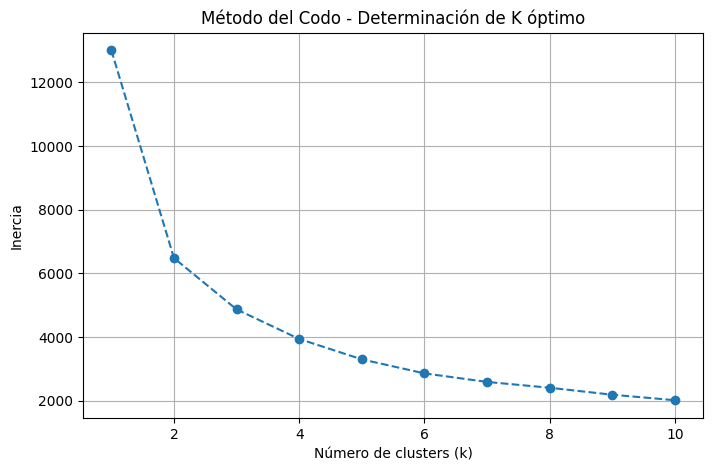

In [17]:
from sklearn.cluster import KMeans


# Lista para guardar las inercias
inertia = []

# Probar k de 1 a 10
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o', linestyle='--')
plt.title('Método del Codo - Determinación de K óptimo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()


In [18]:
# Entrenar modelo K-Means con k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(rfm_scaled)

# Asignar el cluster a cada cliente
rfm['Cluster'] = kmeans.labels_

# Calcular centroides en el espacio original
centroids = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=['Recency', 'Frequency', 'Monetary']
)

# Revertir el logaritmo para interpretar valores reales
centroids = np.expm1(centroids)
centroids['Cluster'] = centroids.index

# Mostrar centroides
print("Centroides de los clusters:")
print(centroids)

# Resumen estadístico por grupo
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency':'median',
    'Frequency':'median',
    'Monetary':['median', 'count']
}).reset_index()

cluster_summary.columns = ['Cluster','Recency_median','Frequency_median','Monetary_median','Count']
cluster_summary


Centroides de los clusters:
      Recency  Frequency     Monetary  Cluster
0   28.729910   3.091777   952.899969        0
1    9.216028  10.611609  4240.636865        1
2  128.104287   1.281118   273.314944        2


,Cluster,Recency_median,Frequency_median,Monetary_median,Count
0,0,30.0,3.0,974.230,1696
1,1,9.0,10.0,3705.995,776
2,2,159.0,1.0,296.815,1866


In [ ]:
# Mediana de actualidad, Mediana de frecuencia, Mediana monetaria, Recuento

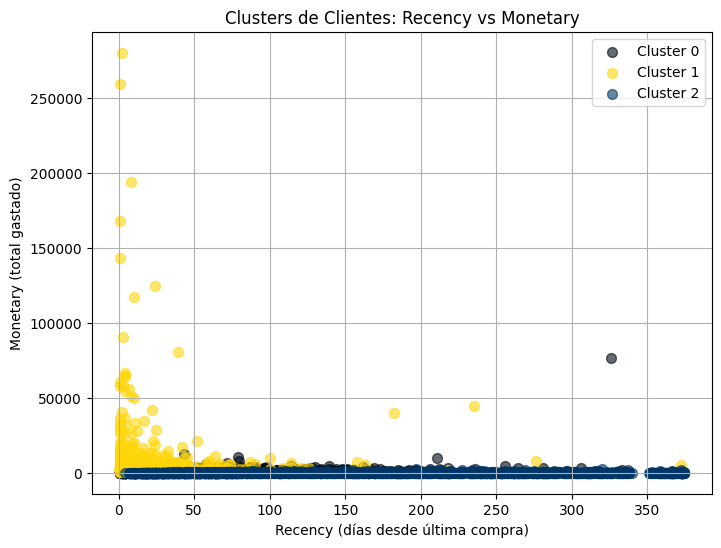

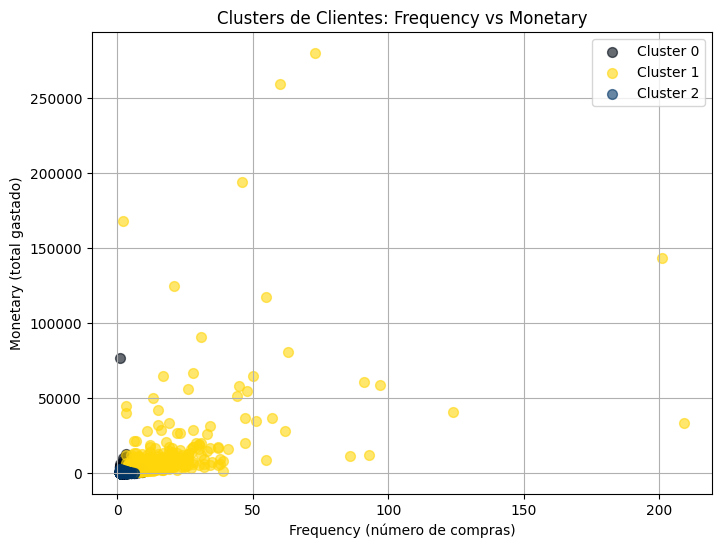

In [20]:
# Paleta de colores
colors = ['#000814', '#FFD60A', '#003566']

# --- Gráfico 1: Recency vs Monetary ---
plt.figure(figsize=(8,6))
for i in range(3):
    cluster = rfm[rfm['Cluster'] == i]
    plt.scatter(cluster['Recency'], cluster['Monetary'],
                s=50, color=colors[i], label=f'Cluster {i}', alpha=0.6)

plt.title('Clusters de Clientes: Recency vs Monetary')
plt.xlabel('Recency (días desde última compra)')
plt.ylabel('Monetary (total gastado)')
plt.legend()
plt.grid(True)
plt.show()


# --- Gráfico 2: Frequency vs Monetary ---
plt.figure(figsize=(8,6))
for i in range(3):
    cluster = rfm[rfm['Cluster'] == i]
    plt.scatter(cluster['Frequency'], cluster['Monetary'],
                s=50, color=colors[i], label=f'Cluster {i}', alpha=0.6)

plt.title('Clusters de Clientes: Frequency vs Monetary')
plt.xlabel('Frequency (número de compras)')
plt.ylabel('Monetary (total gastado)')
plt.legend()
plt.grid(True)
plt.show()
